# Getting started

Sandbox for pymc3 tutorial: https://docs.pymc.io/notebooks/getting_started

## Linear regression

\begin{align}
Y \sim N(\mu, \sigma^2) \\
\mu = \alpha + \beta_1 X_1 + \beta_2 X_2
\end{align}

We assigng the following prior distributions:

\begin{align}
\alpha \sim N(0, 100) \\
\beta_i \sim N(0, 100) \\
\sigma \sim |N(0, 1)|
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.7


## Generating data

In [2]:
# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

Plot simulated data

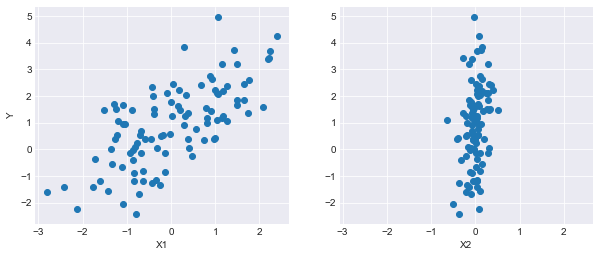

In [3]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

## Model specification

In [4]:
basic_model = pm.Model()

with basic_model:
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=100, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    # Likelihood (sampling distribution) of obesrvations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

## Model fitting
### Maximum a posteriori methods

Seldom used.

In [5]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

/Users/klangner/workspace/python/pymc3-sandbox/venv/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -156.45, ||grad|| = 12.322: 100%|██████████| 19/19 [00:00<00:00, 2430.59it/s]  


{'alpha': array(0.90670682),
 'beta': array([0.94857357, 2.61349541]),
 'sigma_log__': array(-0.03771447),
 'sigma': array(0.96298786)}

### Sampling methods

In [6]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 4088.15draws/s]


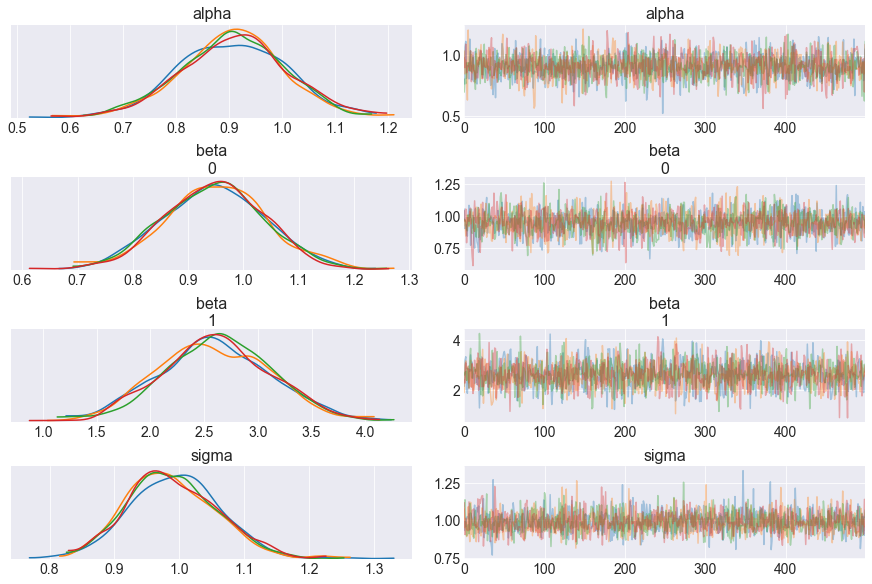

In [7]:
pm.traceplot(trace);